In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel

sns.set()
sns.set_style('darkgrid')

In [2]:
bc = load_breast_cancer()
data = pd.DataFrame(bc.data, columns=bc.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
target = pd.DataFrame(bc.target, columns=['class'])
target.head()

,class
0,0
1,0
2,0
3,0
4,0


              precision    recall  f1-score   support

           0       0.93      0.91      0.92        56
           1       0.94      0.95      0.95        87

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



Text(73.7, 0.5, 'Predicted')

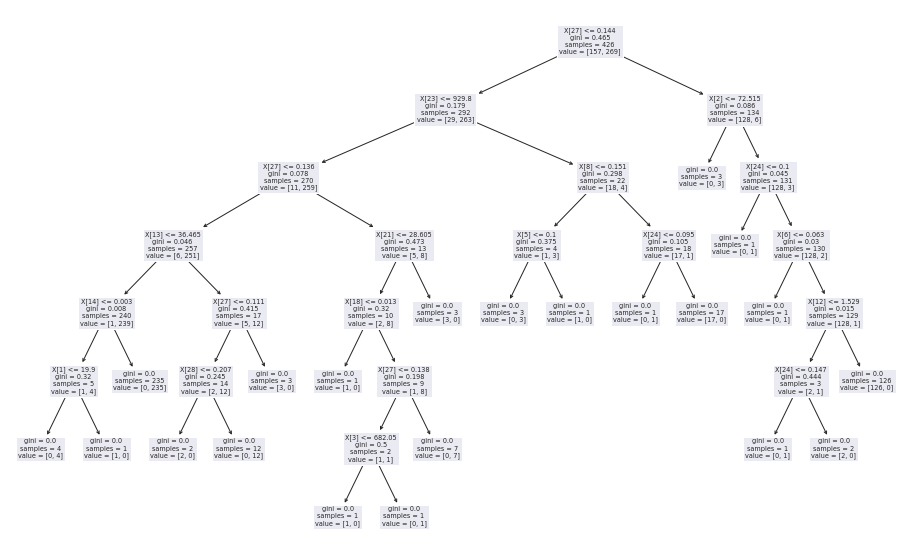

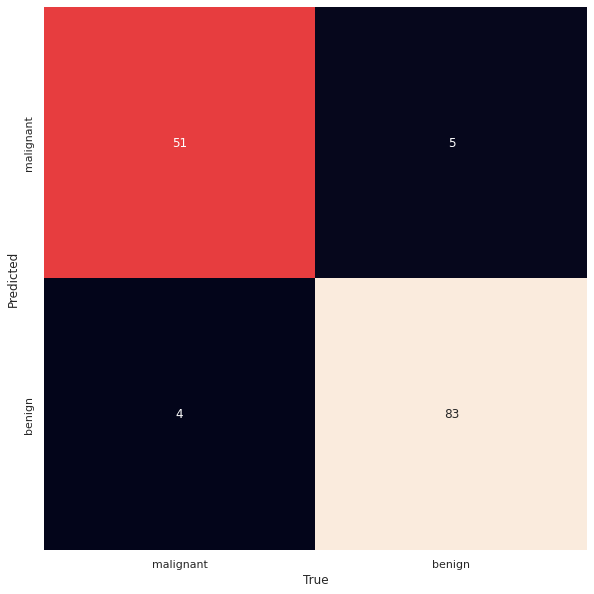

In [4]:
train_data, test_data, train_class, test_class = train_test_split(data, target)
tree = DecisionTreeClassifier().fit(train_data, train_class)
tree_predict = tree.predict(test_data)
plt.figure(figsize=(16,10))
plot_tree(tree)
print(classification_report(tree_predict, test_class))
c = confusion_matrix(test_class, tree_predict)
plt.figure(figsize=(10,10))
ax = sns.heatmap(c.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=bc.target_names, yticklabels=bc.target_names)
ax.set_xlabel('True')
ax.set_ylabel('Predicted')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



Text(73.7, 0.5, 'Predicted')

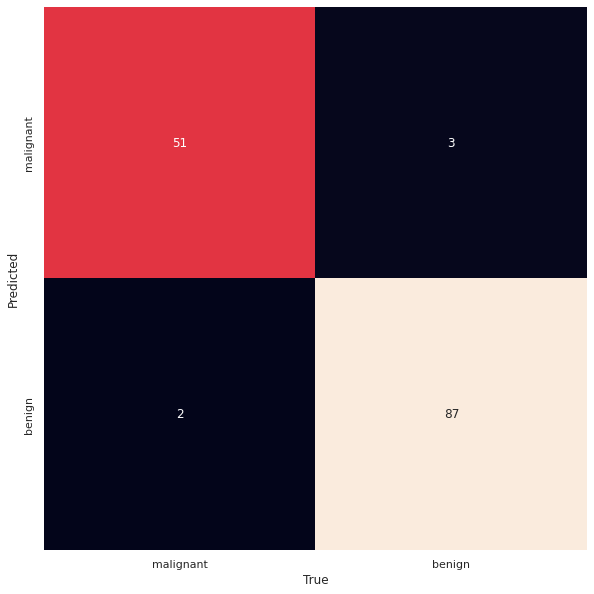

In [ ]:
forest = RandomForestClassifier(n_estimators=200 ,max_samples=0.6).fit(train_data, train_class)
forest_predict = forest.predict(test_data)
print(classification_report(forest_predict, test_class))
c = confusion_matrix(test_class, forest_predict)
plt.figure(figsize=(10,10))
ax = sns.heatmap(c.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=bc.target_names, yticklabels=bc.target_names)
ax.set_xlabel('True')
ax.set_ylabel('Predicted')